# Deephyper analytics - hyperparameter search study
**path to data file**: /Users/romainegele/Documents/lX/2019-2020/s1/MachineLearning1/data-challenge/link-prediction-data-challenge-2019/results.csv

for customization please see: https://matplotlib.org/api/matplotlib_configuration_api.html

## Setup & Data loading

In [18]:
path_to_data_file = '/Users/romainegele/Documents/lX/2019-2020/s1/MachineLearning1/data-challenge/link-prediction-data-challenge-2019/results.csv'

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from datetime import datetime
from tqdm import tqdm
from IPython.display import display, Markdown

width = 21
height = width/1.618

matplotlib.rcParams.update({
    'font.size': 21,
    'figure.figsize': (width, height), 
    'figure.facecolor': 'white', 
    'savefig.dpi': 72, 
    'figure.subplot.bottom': 0.125, 
    'figure.edgecolor': 'white',
    'xtick.labelsize': 21,
    'ytick.labelsize': 21})

df = pd.read_csv(path_to_data_file)

display(Markdown(f'The search did _{df.count()[0]}_ **evaluations**.'))

df.head()

The search did _120_ **evaluations**.

,a1,a10,a11,a12,a13,a14,a15,a16,a17,a2,...,u2,u3,u4,u5,u6,u7,u8,u9,objective,elapsed_sec
0,NaN,relu,relu,tanh,tanh,tanh,relu,relu,tanh,sigmoid,...,59,66,53,65,33,126,117,45,0.942611,59.365659
1,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,...,64,64,64,64,64,64,64,64,0.932890,110.686810
2,tanh,relu,sigmoid,tanh,relu,tanh,sigmoid,relu,relu,relu,...,125,32,58,65,58,43,63,115,0.914717,168.022218
3,tanh,sigmoid,sigmoid,NaN,NaN,tanh,sigmoid,tanh,NaN,tanh,...,71,81,39,77,93,95,45,43,0.931854,223.322693
4,tanh,sigmoid,relu,NaN,relu,relu,relu,relu,sigmoid,tanh,...,123,72,110,69,80,108,47,124,0.912668,284.935192


## Statistical summary

In [20]:
df.describe()

,u1,u10,u11,u12,u13,u14,u15,u16,u17,u2,u3,u4,u5,u6,u7,u8,u9,objective,elapsed_sec
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,76.370370,94.296296,86.759259,76.129630,72.814815,73.833333,80.129630,73.925926,83.888889,69.907407,74.259259,78.166667,86.037037,68.574074,83.629630,90.166667,77.537037,0.927060,1578.918221
std,30.755454,27.171454,28.746081,29.662279,29.755655,27.258199,29.299396,28.946178,27.716671,28.466643,26.309612,28.864518,27.406075,29.304905,30.456462,29.950116,29.107292,0.016662,903.386780
min,32.000000,33.000000,34.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,33.000000,32.000000,32.000000,32.000000,35.000000,0.838783,59.365659
25%,49.250000,80.000000,62.250000,51.000000,48.250000,54.000000,57.250000,51.000000,60.000000,48.250000,56.000000,51.500000,65.000000,40.250000,57.750000,64.000000,51.000000,0.919390,821.066597
50%,70.500000,94.500000,95.500000,73.000000,65.500000,67.000000,79.500000,68.500000,83.500000,60.000000,70.500000,78.000000,83.500000,64.000000,90.500000,94.000000,74.000000,0.932920,1584.598997
75%,101.750000,121.000000,109.000000,98.000000,101.500000,99.000000,103.750000,97.000000,105.500000,95.250000,93.750000,105.000000,112.500000,92.750000,109.750000,118.500000,99.750000,0.936569,2335.385130
max,127.000000,128.000000,127.000000,126.000000,127.000000,125.000000,128.000000,128.000000,128.000000,126.000000,125.000000,128.000000,128.000000,126.000000,127.000000,127.000000,128.000000,0.945973,3104.272245


## Search trajectory

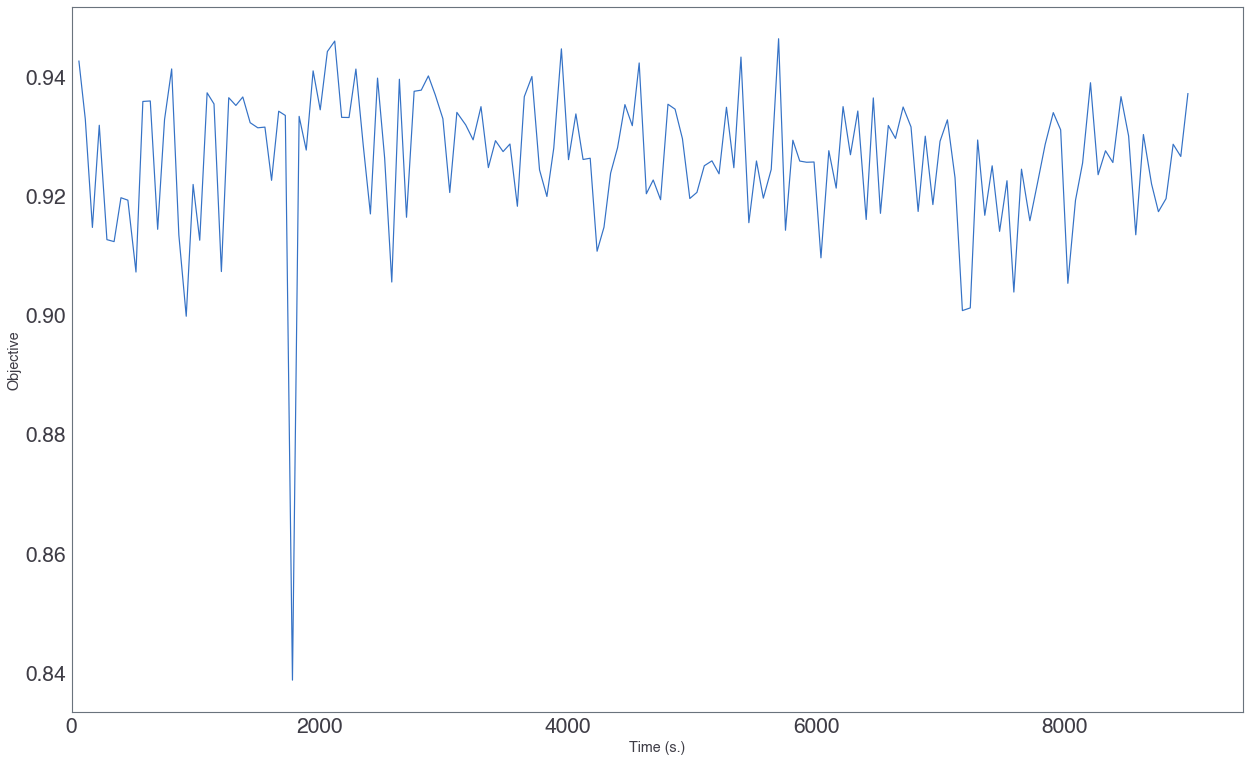

In [25]:
plt.plot(df.elapsed_sec, df.objective)
plt.ylabel('Objective')
plt.xlabel('Time (s.)')
plt.xlim(0)
plt.grid()
plt.show()

## Pairplots

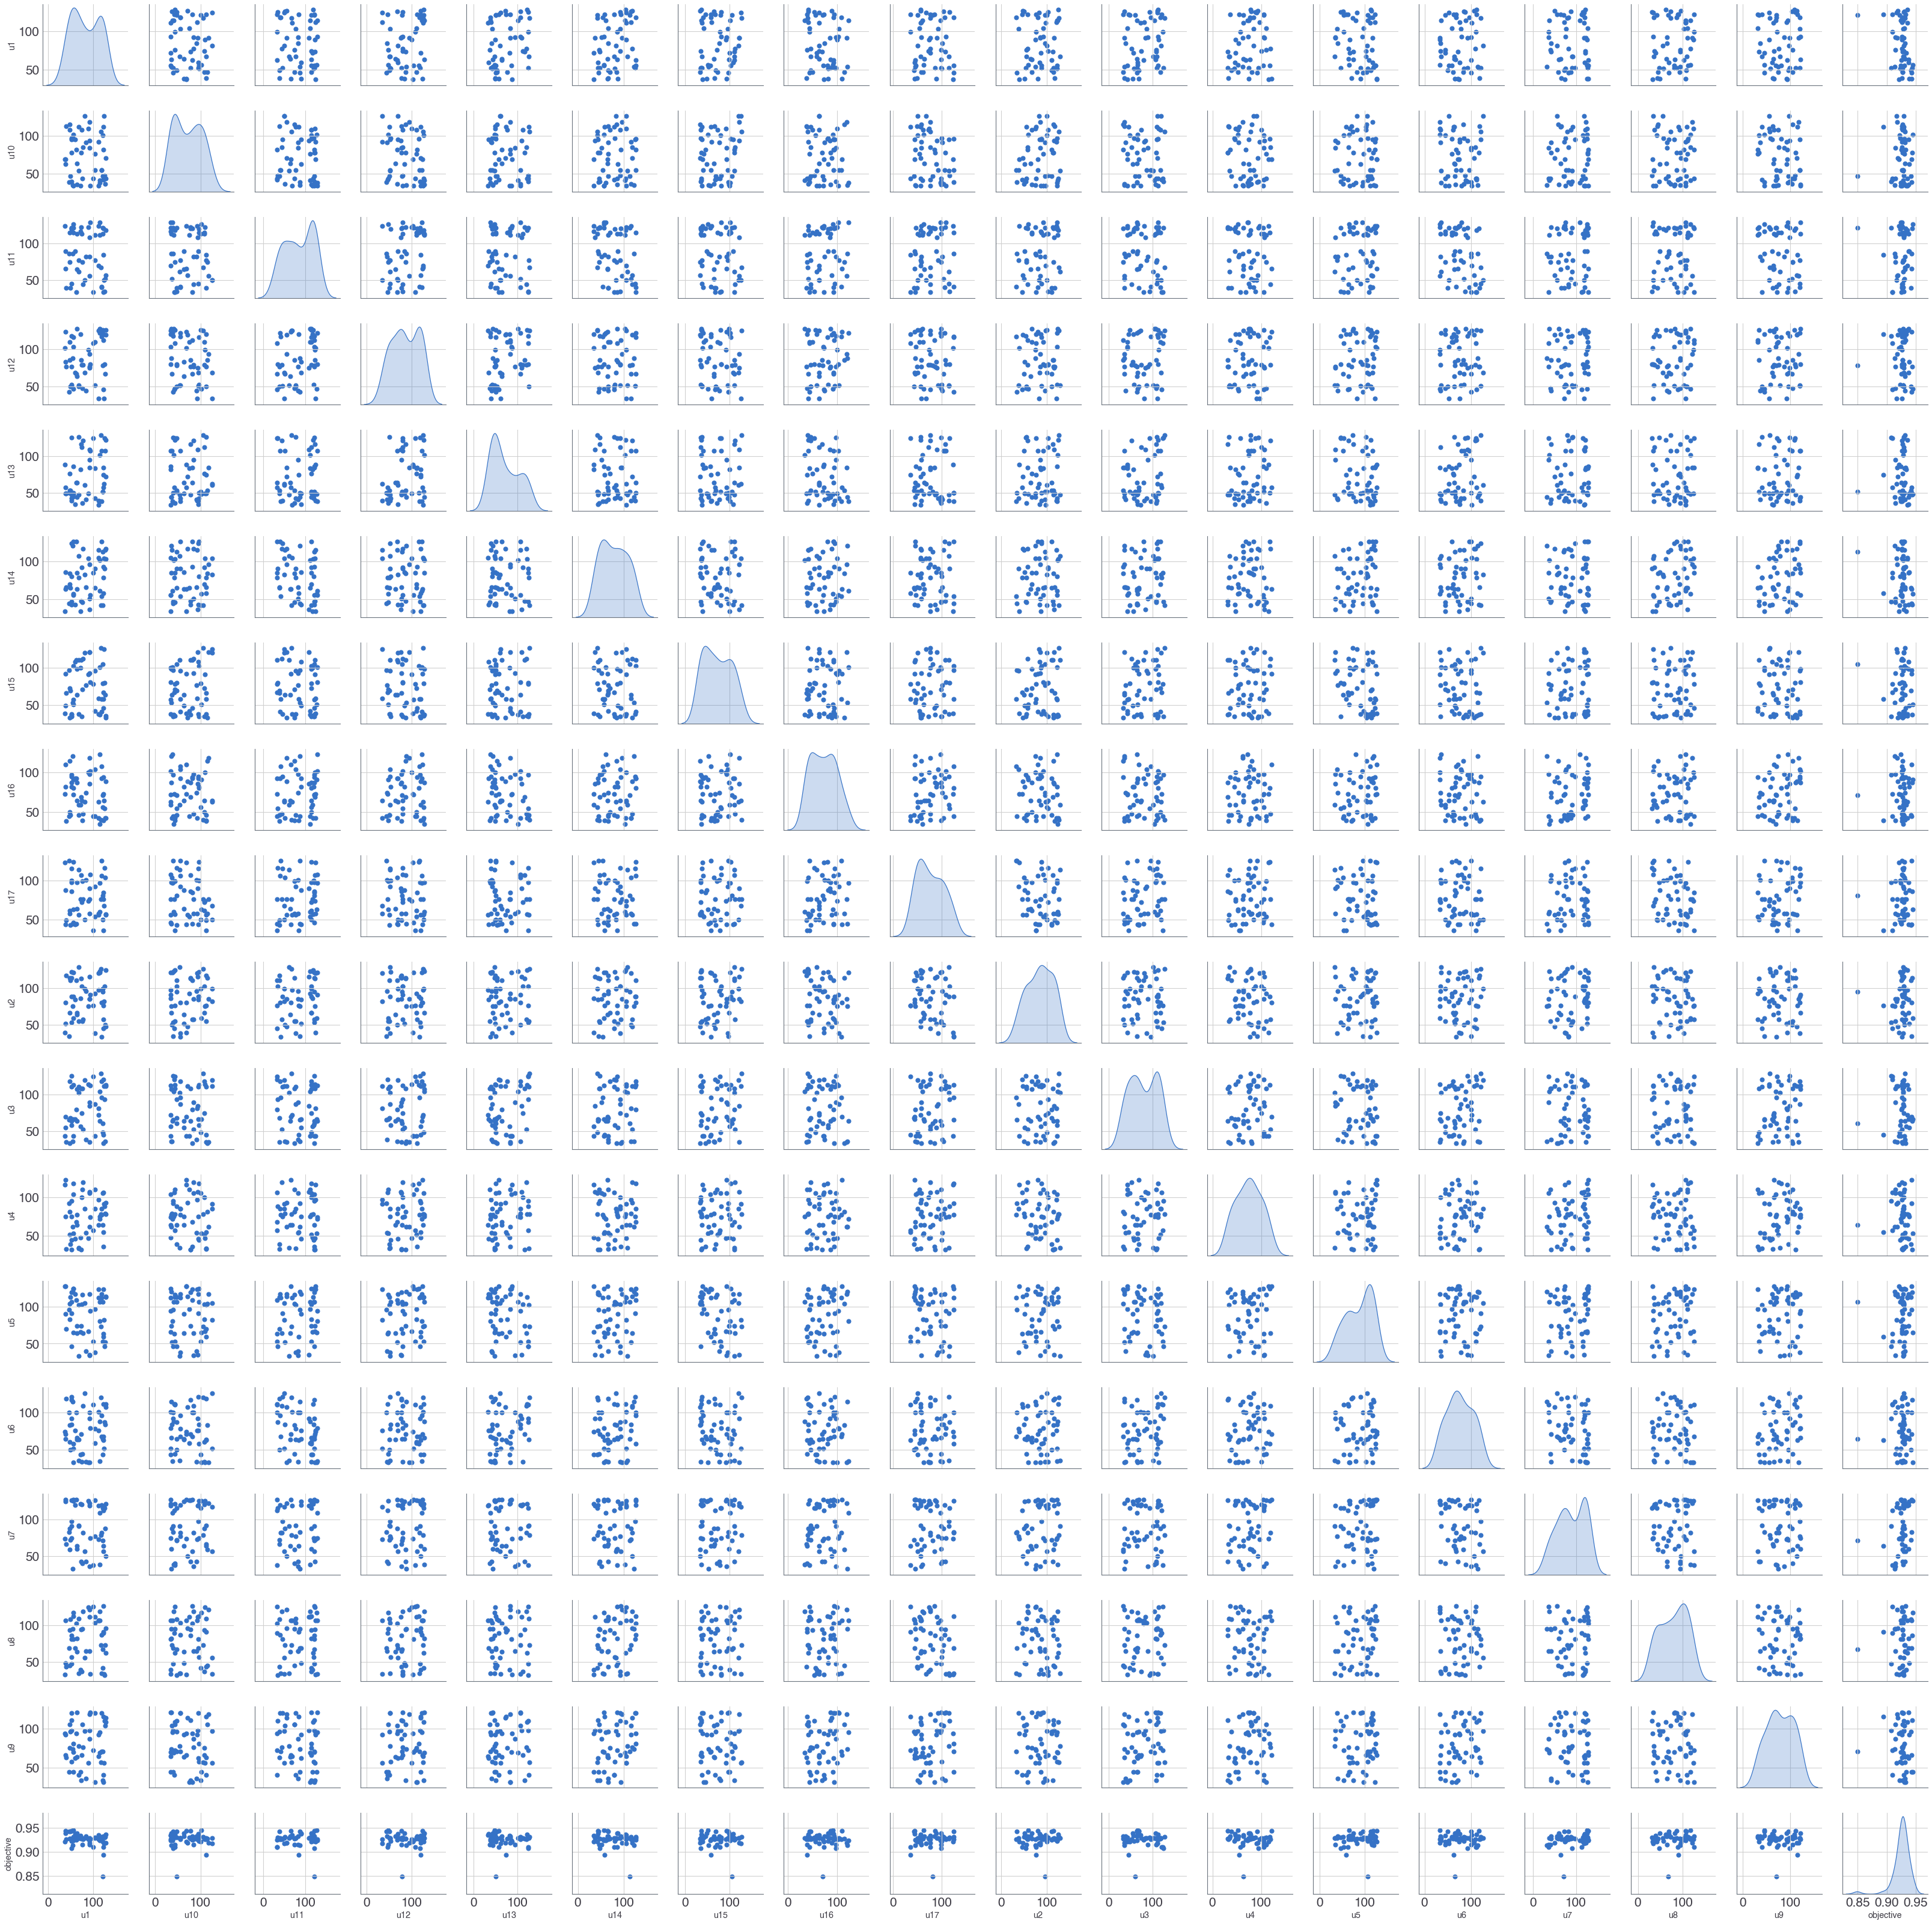

In [5]:
not_include = ['elapsed_sec']
sns.pairplot(df.loc[:, filter(lambda n: n not in not_include, df.columns)],
                diag_kind="kde", markers="o",
                plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                diag_kws=dict(shade=True))
plt.show()

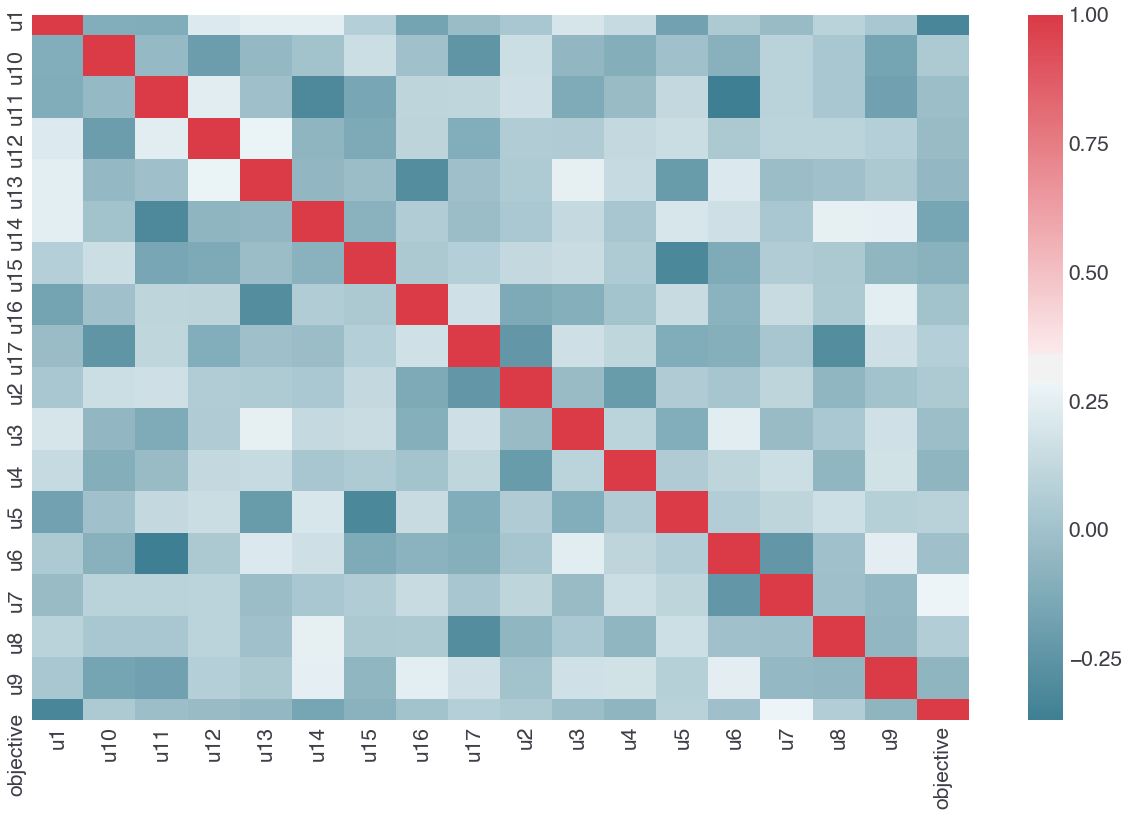

In [6]:
corr = df.loc[:, filter(lambda n: n not in not_include, df.columns)].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

## Best objective

In [26]:
i_max = df.objective.idxmax()
df.iloc[i_max]

a1                  NaN
a10                 NaN
a11                 NaN
a12             sigmoid
a13                tanh
a14                 NaN
a15                tanh
a16                tanh
a17             sigmoid
a2                 relu
a3                 relu
a4                 relu
a5                  NaN
a6                 tanh
a7                 tanh
a8                 relu
a9                 relu
u1                   37
u10                  32
u11                  66
u12                  85
u13                  87
u14                  47
u15                 128
u16                  34
u17                  35
u2                   79
u3                   93
u4                   89
u5                   35
u6                   69
u7                  108
u8                  112
u9                   86
objective      0.946367
elapsed_sec     5696.13
Name: 97, dtype: object

In [23]:
dict(df.iloc[i_max])

{'a1': 'tanh',
 'a10': nan,
 'a11': 'sigmoid',
 'a12': nan,
 'a13': 'sigmoid',
 'a14': 'tanh',
 'a15': 'sigmoid',
 'a16': 'sigmoid',
 'a17': 'sigmoid',
 'a2': 'relu',
 'a3': 'tanh',
 'a4': 'sigmoid',
 'a5': 'tanh',
 'a6': 'tanh',
 'a7': nan,
 'a8': 'relu',
 'a9': nan,
 'u1': 35,
 'u10': 59,
 'u11': 109,
 'u12': 98,
 'u13': 32,
 'u14': 63,
 'u15': 128,
 'u16': 98,
 'u17': 67,
 'u2': 109,
 'u3': 102,
 'u4': 32,
 'u5': 66,
 'u6': 62,
 'u7': 61,
 'u8': 120,
 'u9': 48,
 'objective': 0.945972599253478,
 'elapsed_sec': 2120.253816127777}